In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#df = pd.read_csv("iperf.csv", index_col = [1])
df = pd.read_csv("Teste6/teste6.csv")
#Remove colunas desnecessarias
del df['Timestamp']
del df['?']
del df['ForaOrdem']
del df['Tempo']
dfServer = df[df.IpOri != '10.1.0.2']
dfCliente = df[df.IpOri != '10.1.0.1']
df = dfServer
df = df.reset_index(drop=True)
df

,IpOri,PortaOri,IpDest,PortaDest,BitsEnv,Banda,Jitter,PctPerdido,PctEnv,%Perda
0,10.1.0.1,5061,10.1.0.2,5561,3338370,1271913,0.166,0.0,2271.0,0.000
1,10.1.0.1,5027,10.1.0.2,5527,20159580,3668006,0.120,0.0,13714.0,0.000
2,10.1.0.1,5092,10.1.0.2,5592,27281730,5347312,0.102,0.0,18559.0,0.000
3,10.1.0.1,5091,10.1.0.2,5591,133993440,23349103,0.095,1.0,91153.0,0.001
4,10.1.0.1,5032,10.1.0.2,5532,12752250,3929553,0.103,0.0,8675.0,0.000
5,10.1.0.1,5089,10.1.0.2,5589,86581530,10297062,15.774,387.0,59286.0,0.653
6,10.1.0.1,5042,10.1.0.2,5542,88832100,10611541,0.078,0.0,60430.0,0.000
7,10.1.0.1,5094,10.1.0.2,5594,45858120,9419337,0.096,0.0,31196.0,0.000
8,10.1.0.1,5037,10.1.0.2,5537,4024860,518851,0.121,55.0,2793.0,1.969
9,10.1.0.1,5024,10.1.0.2,5524,40267710,4354485,0.100,0.0,27393.0,0.000


In [3]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

/home/pedro/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
/home/pedro/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/pedro/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


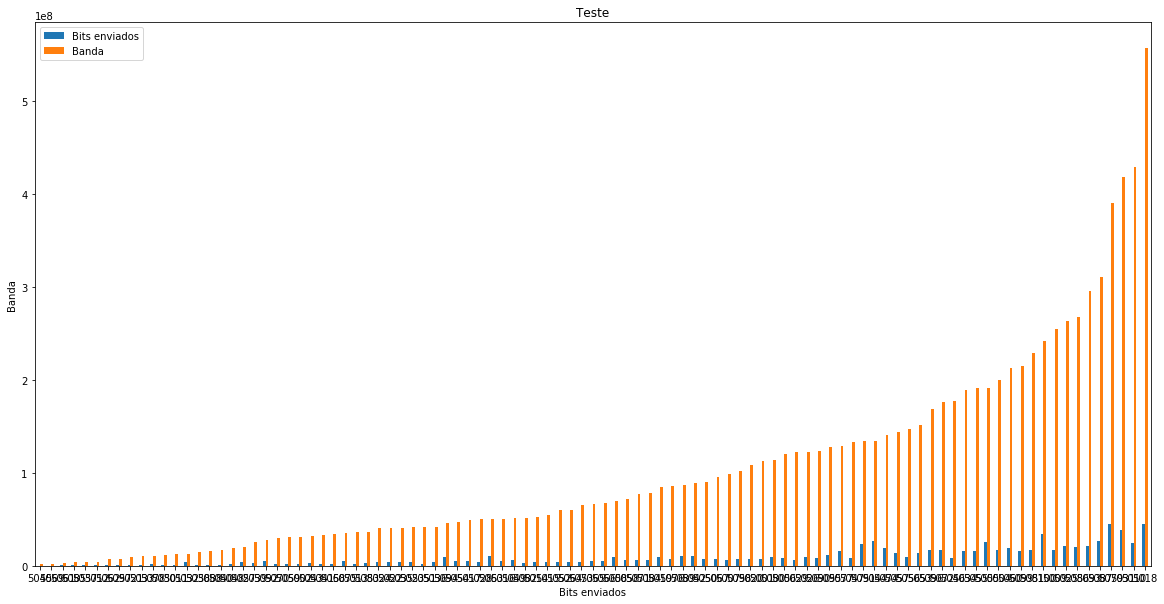

In [4]:
#Removendo trafegos pequenos
df = df.query("BitsEnv > 1000000")

gpb = df.groupby (['PortaOri'])
media = gpb.mean()
err = gpb.aggregate(confinterval)
err = err.filter(items=['Banda', 'BitsEnv'])
media = media.filter(items=['Banda', 'BitsEnv'])
#display (media)
#display (err)

media.sort_values(by=["BitsEnv"]).plot (kind='bar', yerr=err, title="Teste", rot=360, figsize=(20,10))
plt.xlabel('Bits enviados')
plt.ylabel('Banda')
plt.gca().legend(('Bits enviados','Banda'))
#plt.savefig('grafico_teste'.pdf')